In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
'''1) Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]'''
string = "Name1 Surname1, Name2 Surname2,Name3 Surname3, Name4 Surname4,Name5 Surname5"
names_list = string.split(',')
names_list

['Name1 Surname1',
 ' Name2 Surname2',
 'Name3 Surname3',
 ' Name4 Surname4',
 'Name5 Surname5']

In [8]:
'''2) В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием)
Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35'''
df = pd.DataFrame({
    'client_id':[9002,6722,8799,8737,5205],
    'sex':[1,1,1,0,0],
    'wealth':['medium','high','high','low','medium'],
    'age':[63,54,62,54,37]
})
medium_35 = df[(df['wealth']=='medium')&(df['age']>35)]
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5205,0,medium,37


In [ ]:
'''7)💀 Сложное задание! 💀
А теперь создадим свою собственную функцию!
Напишите функцию read_n_agg, которая 
- принимает на вход один параметр – путь к файлу
- считывает переданный файл, в котором разделителем является ;
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
- возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят как в task7.png, датасэт в файле companies.csv'''

In [16]:
def read_n_agg(path):
    df = pd.read_csv(path,sep=';')
    return df.groupby('company',as_index=True).agg({'income':'mean'})

In [18]:
read_n_agg(r'C:\Users\asus\Desktop\DA_projects\karpov\band3\task1\companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [30]:
'''8) Вернемся к данным по поездкам на такси! На этот раз – из Перу,
с рейтингами водителей, пассажиров, координатами, и парой других деталей!
Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя.
Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в taxi.
Может пригодиться: read_csv()
Датасет для задания: taxi_peru.csv (в папке).'''
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%-%d %H:%M:%S")
taxi = pd.read_csv(r'C:\Users\asus\Desktop\DA_projects\karpov\band3\task1\taxi_peru.csv',sep=';',
                  parse_dates=['start_at','end_at','arrived_at'])
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [33]:
'''9) Проверьте, с какой платформы было сделано больше всего заказов.
В ответе укажите значение в %, округлённое до целого.'''
taxi['source'].value_counts(normalize=True)

iPhone     0.423743
web        0.331956
Android    0.213546
iPad       0.024839
Wap        0.005916
Name: source, dtype: float64

In [65]:
'''10) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts'''
driver_score_counts = taxi['driver_score'].value_counts(normalize=True).mul(100).round(2) \
    .reset_index().rename({'index':'driver_score','driver_score':'percentage'},axis=1) \
    .sort_values(by='driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


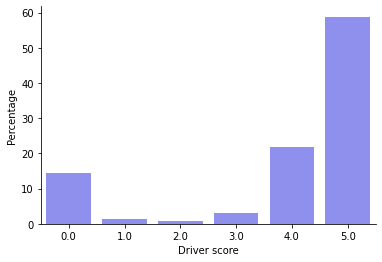

In [67]:
'''11) Теперь строим график! (task11.png) Сначала импортируем библиотеки:
import seaborn as sns
import matplotlib.pyplot as plt
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()
'''
import seaborn as sns
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue',alpha=0.5 )
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [79]:
'''12) 💀 Сложное задание! 💀
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?
'''
driver_score_counts = taxi['rider_score'].value_counts(normalize=True).mul(100).round(2) \
    .reset_index().rename({'index':'rider_score','rider_score':'percentage'},axis=1) \
    .sort_values(by='rider_score')
driver_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


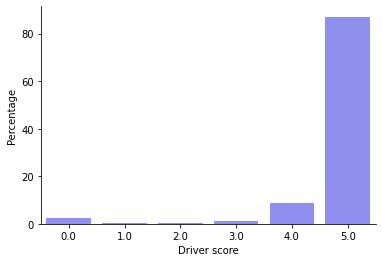

In [80]:
ax = sns.barplot(x='rider_score', y='percentage', data=driver_score_counts, color='blue',alpha=0.5 )
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()